In [ ]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading Dataframe 
df= pd.read_csv("/content/insurance.csv")

In [ ]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,NaN,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
df.tail()

,Age,Gender,BMI,Children,Smoker,Region,Charges
1333,50,male,30.97,3.0,no,northwest,10600.5483
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,1629.8335
1336,21,female,25.80,NaN,no,southwest,2007.9450
1337,61,female,29.07,0.0,yes,northwest,29141.3603


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [ ]:
df.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1295.000000,1338.000000
mean,39.207025,30.663397,1.097297,13270.422265
std,14.049960,6.098187,1.208465,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1295 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum() #sum of Null Values

Age          0
Gender       0
BMI          0
Children    43
Smoker       0
Region       0
Charges      0
dtype: int64

In [ ]:
df["Children"].mean() #mean - Regression Model , #mode -Classification Model

1.0972972972972972

In [ ]:
df["Children"]=df["Children"].fillna(1)  #Filling Missing Values

In [ ]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

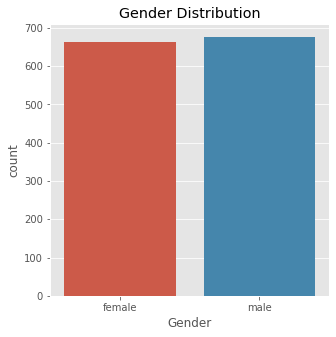

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

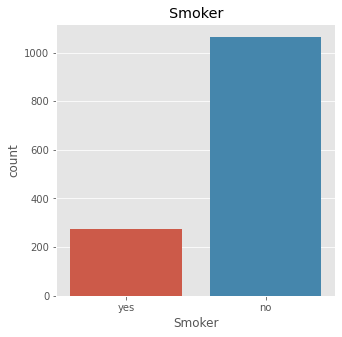

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Smoker', data=df)
plt.title('Smoker')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

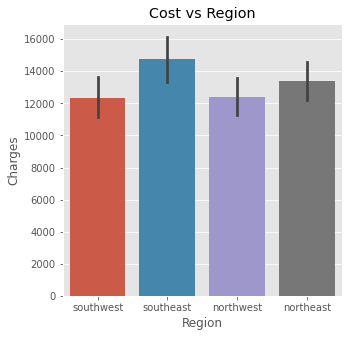

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Region', y='Charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

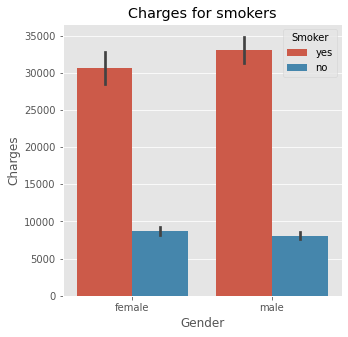

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Gender', y='Charges',hue='Smoker', data=df)
plt.title('Charges for smokers')

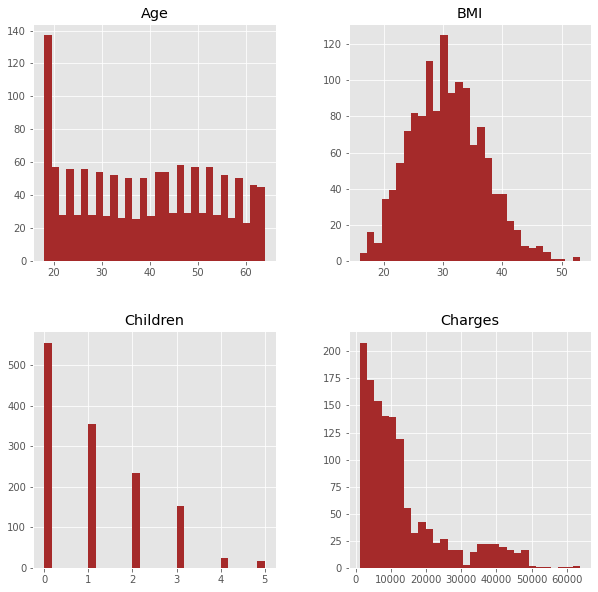

In [ ]:
df[['Age','BMI','Children','Charges']].hist(bins=30, figsize=(10,10), color='brown')
plt.show()


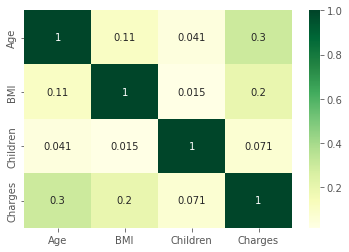

In [ ]:
sns.heatmap(df.corr(),cmap='YlGn',annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of insurance charges')

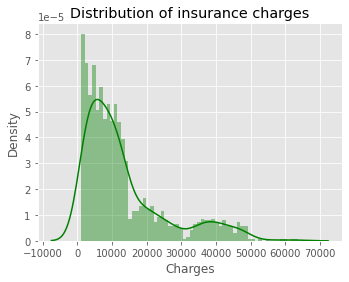

In [ ]:
plt1=plt.figure(figsize=(12,4))
ax=plt1.add_subplot(121)
sns.distplot(df['Charges'],bins=60,color='g',ax=ax)
ax.set_title("Distribution of insurance charges")

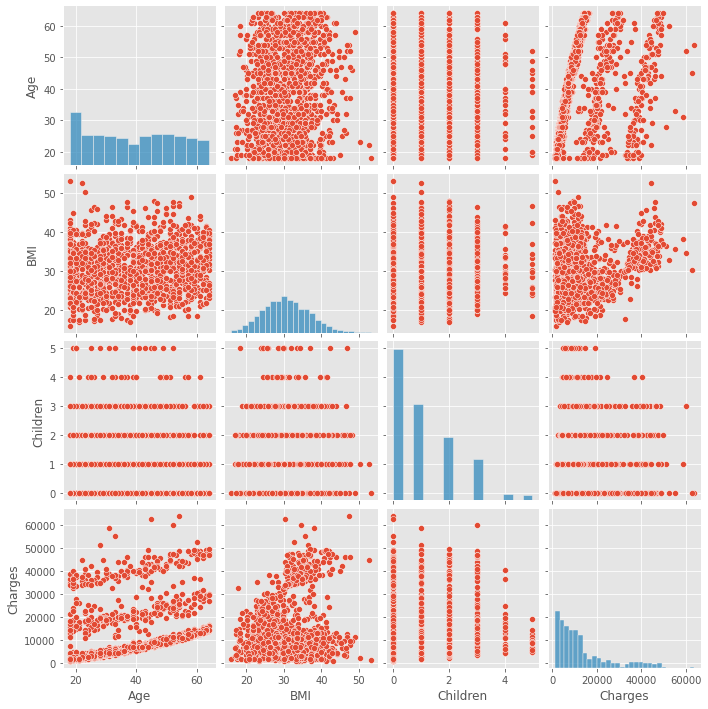

In [ ]:
sns.pairplot(df)

In [ ]:
#mporting Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# encoding sex column
df.replace({'Gender':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
df.replace({'Smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'Region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
# Making Two New Datasets[X,Y] from Exist one[Insurance]

x = df.drop(columns='Charges', axis=1)
y =df['Charges']

In [ ]:
print(x)

      Age  Gender     BMI  Children  Smoker  Region
0      19       1  27.900       0.0       0       1
1      18       0  33.770       1.0       1       0
2      28       0  33.000       1.0       1       0
3      33       0  22.705       0.0       1       3
4      32       0  28.880       0.0       1       3
...   ...     ...     ...       ...     ...     ...
1333   50       0  30.970       3.0       1       3
1334   18       1  31.920       0.0       1       2
1335   18       1  36.850       0.0       1       0
1336   21       1  25.800       1.0       1       1
1337   61       1  29.070       0.0       0       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64


In [ ]:
#Training and Testing Variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
training_data_prediction =reg.predict(x_train)

In [ ]:
# R squared value
r_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale for Training Data : ', r_train)

R squared vale for Training Data :  0.7440170112781879


In [ ]:
test_predict=reg.predict(x_test)

In [ ]:
r_test= metrics.r2_score(y_test, test_predict)
print('R squared vale for Testing Data : ', r_test)

R squared vale for Testing Data :  0.7718137672778366


In [ ]:
input_data=input()

13,1,25.74,0,0,0


In [ ]:
# input_data = (13,1,25.74,0,0,0)
mub=input()
input = tuple(map(int, mub.split(',')))

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(type(input_data))
prediction = reg.predict(input_data_reshaped)

print('The insurance cost is USD ', prediction[0])

12,1,33,0,1,0
<class 'str'>
The insurance cost is USD  1344.7082467570726


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
